# Cluster the Data points using Random Forest and use this Information to Create the Similarity Matrix to Fill The missing Value in the Dataset



Steps:

1.Label The data.

2.Fit RandomForest Regressor. 

3.Create the Proximity_matrix(similarity Matrix).

4.Fill the missing Values using Proximity Matrix.

5.Plot the MDP plot(Visualize the similarity between the data points).

Lets Start!!!!!!!!!!!


# How a Clustering Work with the Random forest?

In Random Forest there are numbers of Trees or The collection of Decision Tree is Random forest.
In the end of every Decision Tree it will come to a leaf node and the Data Points which have the same Leaf node are clustered,

and doing this things in metric form , proximity matrix is introduce which measure the similarity between the data points.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.manifold import MDS
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Label Encoding.

Basic Label_Encoding that is find unique element in columns and replace with it's Index value.

**Note**:There is no changes to NaN values 

In [ ]:
def label_data(data):
    column=data.columns
    Type={}
    replace_dict={}
    for col in column:
        temp=data[col][np.nonzero(~(data[col].isna()))[0]].values
        unique=np.unique(temp)
        unique=np.delete(unique,np.nan)
        if(temp.dtype=='O'):
            #categorical
            Type[col]='categorical'
            r_dict={}
            for i in range(len(unique)):r_dict[unique[i]]=i
            data[col]=data[col].replace(r_dict)
            replace_dict[col]=r_dict
        else:
            if(str(temp.dtype).startswith('int') and len(unique)<=15):
                Type[col]='ordinal'
                r_dict={}
                for i in range(len(unique)):r_dict[unique[i]]=i
                data[col]=data[col].replace(r_dict)
                replace_dict[col]=r_dict
            
            else:
                Type[col]='continous'
            
    return replace_dict,Type

Create the dataset by removing the row with NaN values and keep this dataset for training the model.

Now the basic concepts comes that is the combination of Decision Tree is the Random_Forest!!

Inorder to create  Random Forest we need Boostrap_Dataset.
Bootsrtapping is process in which random selection of data point given the size of Boostrap_dataset.

Now the Next step to fit this dataset and create the forest.

In [ ]:
def Bootstrapping(data,n_bootstrap):
    #random sample from train_df of size n_bootstrapping
    data=data.copy()
    indices=np.random.randint(low=0,high=data.shape[0],size=n_bootstrap)
    df_bootstarp=data.iloc[indices,:] #bootstrap dataset
    del data
    return df_bootstarp

#apply random forest algo
def random_forest(data,n_features,n_trees,n_bootstrap,dt_max_dept):
    #combination of decision tress is random forest
    #iter over the decision tree
    data=data.copy()
    print(data.shape[0])
    forest=[]
    for i in tqdm(range(n_trees)):
        df_bootstrap=Bootstrapping(data,n_bootstrap)
        tree=DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=None,min_samples_split=2,
                                    min_samples_leaf=10,min_weight_fraction_leaf=0.0,max_features=None,
                                    random_state=42,max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,
                                   presort='deprecated',ccp_alpha=0.0,)
        tree.fit(df_bootstrap.iloc[:,0:-1],df_bootstrap.iloc[:,-1])
        print(tree.score(df_bootstrap.iloc[:,0:-1],df_bootstrap.iloc[:,-1]))
        forest.append(tree)
    del data,df_bootstrap
    return forest

#  The Main Concept......
**Proximity_Matrix** :Lets Understand from example,In This figure, Matrix with Dimension 4x4 Each row and col represent the sample and each grid shows the similarity values. that is row=3 that is sample 3 and col=4 that is sample 4 and [3,4]=(similarity value).Proximity Matrix intialize with  all the values are zeros with size nxn, n no of sample.

**Calculation of Proximity Matrix**:Above we are able to create Random Forest from Decision_trees and  data with nan values replaces with mode/median, Mode for categorical and Median for Numerical Columns.

start prediction with Each tree and for each tree we have some prediction value based upon this values we will group the samples 

For Example:

do this for all tree.


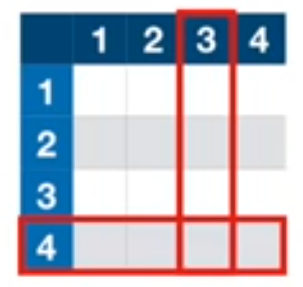
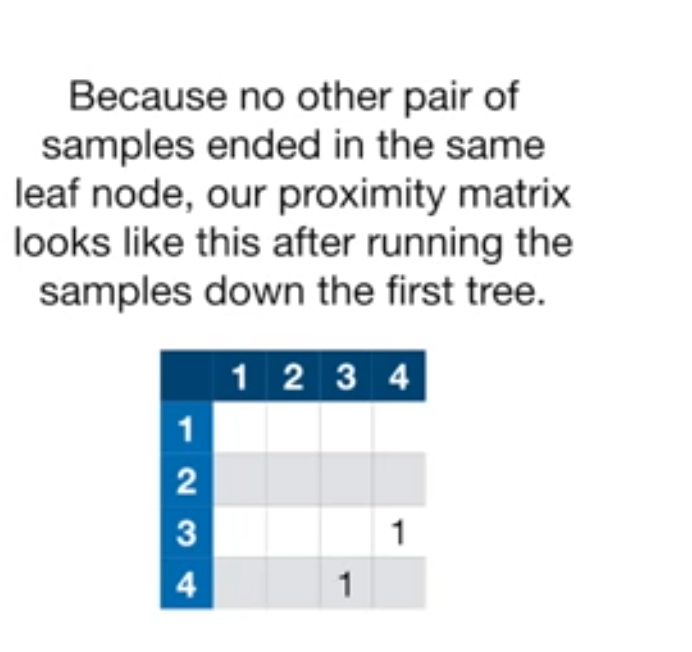
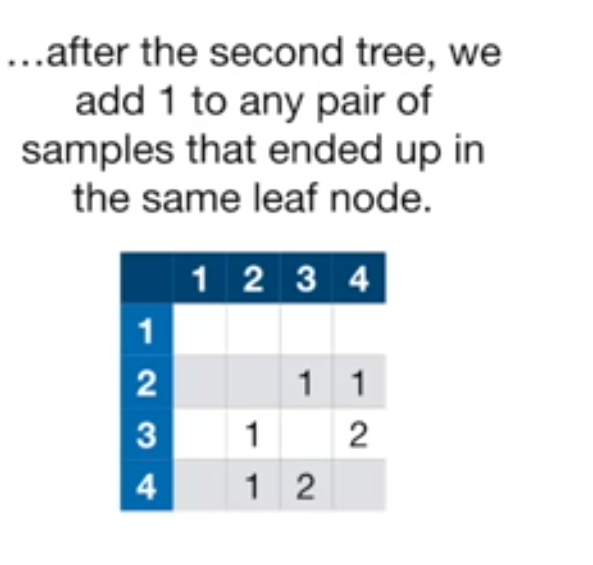
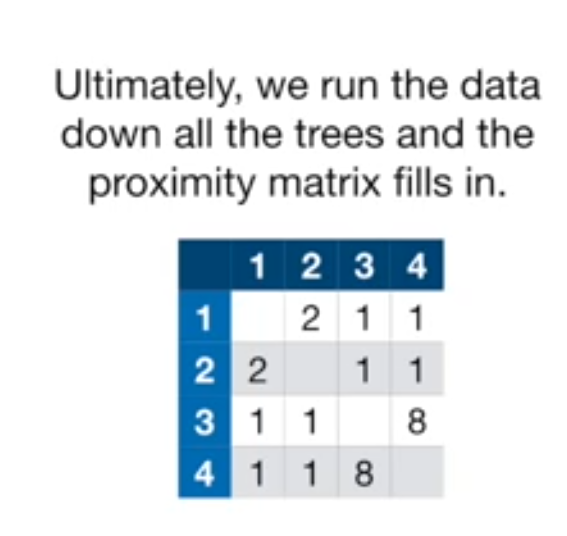
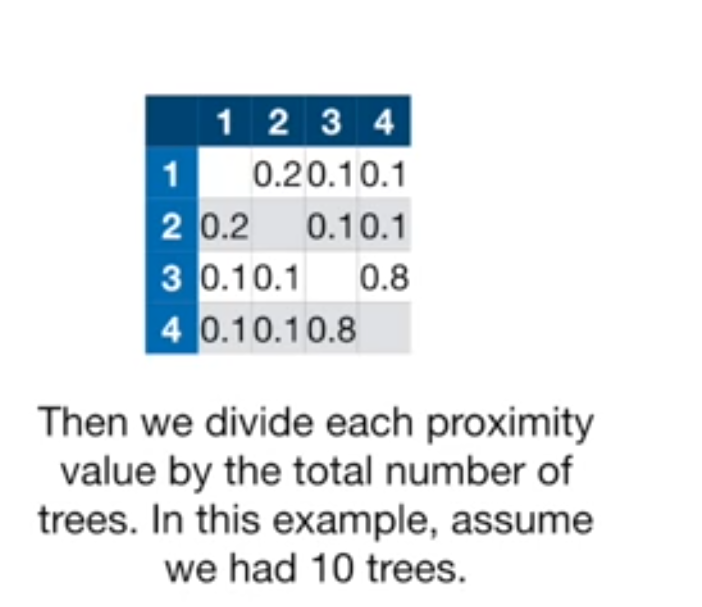
Finally we got Proximity matrix

Find out the location of nan value so that  the nan values can be replaced with weighted average with proximity matrix...........

Repeat the above method that is  calculating proximity matrix and get weighted average untils the values is converged.

# Reverse The Labels

Label Encoding that is done on the Categorical Vairable are reversed as given in the RAW Data.

In [ ]:
def reverse_label(self,data,replace_dict,Type):
    column=data.columns
    for col in column:
        if(Type[col]!='continous'):
            r_dict=replace_dict[col]
            key=r_dict.keys()
            rev_dict={}
            for k in key:rev_dict[r_dict[k]]=k
            data[col]=data[col].replace(rev_dict)

# Final Combined Source Code

In [ ]:
class Random_forest_imputer:
    def __init__(self,
               n_trees=100,
               n_bootstrap=400,
               criterion='mse',
               splitter='best',
               max_depth=None,
               min_samples_split=2,
               min_samples_leaf=10,
               min_weight_fraction_leaf=0.0,
               max_features=None,
               random_state=42,
               max_leaf_nodes=None,
               min_impurity_decrease=0.0,
               min_impurity_split=None,
               presort='deprecated',ccp_alpha=0.0):
        self.n_bootstrap=n_bootstrap
        self.n_trees=n_trees
        self.criterion=criterion
        self.splitter=splitter
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.min_samples_leaf=min_samples_leaf
        self.min_weight_fraction_leaf=min_weight_fraction_leaf
        self.max_features=max_features
        self.random_state=random_state
        self.max_leaf_nodes=max_leaf_nodes
        self.min_impurity_decrease=min_impurity_decrease
        self.min_impurity_split=min_impurity_split
        self.presort=presort
        self.ccp_alpha=ccp_alpha
    
    def label_data(self,data):
        column=data.columns
        Type={}
        replace_dict={}
        for col in column:
            temp=data[col][np.nonzero(~(data[col].isna()).values)[0]].values
            unique=np.unique(temp)
            unique=np.delete(unique,np.nan)
            if(temp.dtype=='O'):
                #categorical
                Type[col]='categorical'
                r_dict={}
                for i in range(len(unique)):r_dict[unique[i]]=i
                data[col]=data[col].replace(r_dict)
                replace_dict[col]=r_dict
            else:
                if(str(temp.dtype).startswith('int') and len(unique)<=15):
                    Type[col]='ordinal'
                    r_dict={}
                    for i in range(len(unique)):r_dict[unique[i]]=i
                    data[col]=data[col].replace(r_dict)
                    replace_dict[col]=r_dict

                else:
                    Type[col]='continous'
        return data,replace_dict,Type
    
    def reverse_label(self,data,replace_dict,Type):
        column=data.columns
        for col in column:
            if(Type[col]!='continous'):
                r_dict=replace_dict[col]
                key=r_dict.keys()
                rev_dict={}
                for k in key:rev_dict[r_dict[k]]=k
                data[col]=data[col].replace(rev_dict)


    def Bootstrapping(self,data):
        #random sample from train_df of size n_bootstrapping
        n_bootstrap=self.n_bootstrap
        data=data.copy()
        indices=np.random.randint(low=0,high=data.shape[0],size=n_bootstrap)
        df_bootstarp=data.iloc[indices,:] #bootstrap dataset
        del data
        return df_bootstarp

    #apply random forest algo
    def random_forest(self,data):
        #combination of decision tress is random forest
        #iter over the decision tree
        score=[]
        data=data.copy()
        print(data.shape[0])
        forest=[]
        for i in tqdm(range(self.n_trees)):
            df_bootstrap=self.Bootstrapping(data)
            tree=DecisionTreeRegressor(criterion=self.criterion,splitter=self.splitter,max_depth=self.max_depth,min_samples_split=self.min_samples_split,
                                        min_samples_leaf=self.min_samples_leaf,min_weight_fraction_leaf=self.min_weight_fraction_leaf,max_features=self.max_features,
                                        random_state=self.random_state,max_leaf_nodes=self.max_leaf_nodes,min_impurity_decrease=self.min_impurity_decrease,min_impurity_split=self.min_impurity_split,
                                       presort=self.presort,ccp_alpha=self.ccp_alpha)
            tree.fit(df_bootstrap.iloc[:,0:-1],df_bootstrap.iloc[:,-1])
            score.append(tree.score(df_bootstrap.iloc[:,0:-1],df_bootstrap.iloc[:,-1]))
            forest.append(tree)
        print('Forest Accuracy',np.mean(score))
        del data,df_bootstrap
        return forest
    
    def fill_na(self,data,Type):
        columns=data.columns
        for col in columns:
            unq=data[col].unique()
            temp=data[col].values
            if(Type[col]!='continous'):
                value=data[col].mode().values[0]
            else:
                #'continous' Vairable
                value=data[col].median()
            data[col].fillna(value=value,inplace=True)
    
    def combination(self,array):
        a=[]
        for i in array:
            for j in array:
                if(i!=j):
                    a.append([int(i),int(j)])
        del array
        return a

    def proximity_matrix(self,data,pred,proximity):
        ind_pred=data.index
        pred_ind=[[pred_,ind_] for pred_,ind_ in zip(pred,ind_pred)]
        pred_ind=np.sort(pred_ind,axis=0)
        grp_ind=np.split(pred_ind[:,1],np.cumsum(np.unique(pred_ind[:,0],return_counts=True)[1])[:-1])

        #proximity=proximity.toarray()            
        for array in grp_ind:
            cmb=self.combination(array)
            for row,col in cmb:
                proximity[row,col]+=1

        return proximity
    def main_function(self,train_df):
        data,replace_dict,Type=self.label_data(train_df)
        data=train_df.copy()
        #find location of missing values
        #before that remove the columns wich have more 50% NaN Value
        indices_remove=np.nonzero(((train_df.isna().sum().values)/train_df.shape[0]>=0.5)*1)
        indices=np.delete(np.arange(data.shape[1]),indices_remove)
        train_df=train_df.iloc[:,indices]
        data=data.iloc[:,indices]
        row,col=np.nonzero((data.isna().values)*1)
        proximity=np.zeros((data.shape[0],data.shape[0]))
        ind_nul=np.array([[r,c] for r,c in zip(row,col)])
        #ind_nul=np.sort(ind_nul,axis=0)
        del row,col
        train=train_df.iloc[np.delete(np.array(train_df.index),np.nonzero(np.array(train_df.isna().sum(axis=1)))[0]),:]
        print('creating Tree............')
        forest=self.random_forest(train)
        print('proximity_matrix Processing...........')
        self.fill_na(data,Type)
        #return data
        for tree in tqdm(forest):
            pred=tree.predict(data.iloc[:,0:-1])
            proximity=self.proximity_matrix(data,pred,proximity)

        del tree
        proximity=proximity/self.n_trees#n_trees
        print('starts filling nan values.........')
        for r,c in ind_nul:
            similarity=proximity[r,:]
            if(len(data.iloc[:,c].unique())<=15):
                #categorical vairable
                unique,count=np.unique(data.iloc[:,c].values,return_counts=True)
                weighted=[]
                for u,cnt in zip(unique,count):
                    prob=cnt/count.sum()
                    vector=(data.iloc[:,c]==u)*1
                    weighted.append([prob*(np.dot(vector,similarity))/similarity.sum(),u])
                weighted=np.sort(weighted,axis=0)
                data.iloc[r,c]=weighted[-1,1]

            else:
                #continous values
                value=np.dot(similarity,data.iloc[:,c].values)/sum(similarity)
                data.iloc[r,c]=value
        
        self.reverse_label(data,replace_dict,Type)
        print('imputation completed')
        #finally data is imputed
        return data,proximity

In [ ]:
data=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
imp=Random_forest_imputer()
data_transformed,proximity=imp.main_function(data.copy())

In [ ]:
np.nonzero(1*(~(data["MSSubClass"].isna())).values)

# MDS Plot

**Multidimensional scaling**(MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals"

In [ ]:
from sklearn.manifold import MDS
proximity_diss=1-proximity 
embedding = MDS(n_components=2)
transformed_proximity=embedding.fit_transform(proximity_diss)

In [ ]:
import matplotlib.pyplot as plt
#ploting first 50 sample
r=50
x=[i[0] for i in transformed_proximity]
y=[i[1] for i in transformed_proximity]
x=x[0:r]
y=y[0:r]
fig, ax = plt.subplots()

ax.scatter(x, y)

for i in (np.arange(r)):
    ax.annotate(i+1, (x[i], y[i]))

# By looking the Above plot it's clear that sample which are closer are more similar and vice versa